In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
shootout = pd.read_csv("shootouts.csv")
results = pd.read_csv("results.csv")
rankings = pd.read_csv("rankings.csv")

# DecisionTreeRegressor() + Data Cleaning

In [3]:
results.head()

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1  1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
2  1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
3  1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
4  1876-03-04  Scotland   England         3.0         0.0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False

In [4]:
results.shape

(43045, 9)

In [5]:
lst_winners = []

In [6]:

winner = pd.DataFrame(results, columns = ["home_score", "home_team", "away_score", "away_team"])

for a in range(len(winner)):
    if winner.loc[a, "home_score"] > winner.loc[a, "away_score"]:
        lst_winners.append(winner.loc[a, "home_team"])
    elif winner.loc[a, "home_score"] < winner.loc[a, "away_score"]:
        lst_winners.append(winner.loc[a, "away_team"])
    else:
        lst_winners.append("Tie")

In [7]:
len(lst_winners)

43045

In [8]:
results = results.assign(winner = lst_winners)

In [9]:
results.head()

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1  1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
2  1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
3  1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
4  1876-03-04  Scotland   England         3.0         0.0   Friendly  Glasgow   

    country  neutral    winner  
0  Scotland    False       Tie  
1   England    False   England  
2  Scotland    False  Scotland  
3   England    False       Tie  
4  Scotland    False  Scotland

In [10]:
shootout.head()

date    home_team         away_team       winner
0  1967-08-22        India            Taiwan       Taiwan
1  1971-11-14  South Korea  Vietnam Republic  South Korea
2  1972-05-17     Thailand       South Korea  South Korea
3  1972-05-19     Thailand          Cambodia     Thailand
4  1973-07-26     Malaysia            Kuwait     Malaysia

In [11]:
rankings.head()

rank country_full country_abrv  total_points  previous_points  rank_change  \
0     1      Germany          GER           0.0               57            0   
1     2        Italy          ITA           0.0               57            0   
2     3  Switzerland          SUI           0.0               50            9   
3     4       Sweden          SWE           0.0               55            0   
4     5    Argentina          ARG           0.0               51            5   

   cur_year_avg  cur_year_avg_weighted  last_year_avg  last_year_avg_weighted  \
0           0.0                    0.0            0.0                     0.0   
1           0.0                    0.0            0.0                     0.0   
2           0.0                    0.0            0.0                     0.0   
3           0.0                    0.0            0.0                     0.0   
4           0.0                    0.0            0.0                     0.0   

   two_year_ago_avg  two_year_ago_weighted  three_year_ago_avg  \
0               0.0                    0.0                 0.0   
1               0.0                    0.0                 0.0   
2               0.0                    0.0                 0.0   
3               0.0                    0.0                 0.0   
4               0.0                    0.0                 0.0   

   three_year_ago_weighted confederation rank_date  year  
0                      0.0          UEFA  8/8/1993  1993  
1                      0.0          UEFA  8/8/1993  1993  
2                      0.0          UEFA  8/8/1993  1993  
3                      0.0          UEFA  8/8/1993  1993  
4                      0.0      CONMEBOL  8/8/1993  1993

In [12]:
s = results.shape
df2 = results.dropna()
s2 = df2.shape

In [13]:
s, s2

((43045, 10), (43044, 10))

In [14]:
#hypothetically finding the average rank of Italy over the years
rankings[rankings["country_full"] == "Italy"].groupby("year").mean()

rankingMean = rankings.groupby(["country_full", "year"]).mean()
rankingMean.reset_index(inplace=True)

In [15]:
rankingMean.head()

country_full  year        rank  total_points  previous_points  rank_change  \
0  Afghanistan  2003  199.000000           0.0        37.333333     0.666667   
1  Afghanistan  2004  197.500000           0.0        63.500000    -0.333333   
2  Afghanistan  2005  198.833333           0.0        55.416667     0.916667   
3  Afghanistan  2006  181.454545           0.0        71.545455     0.818182   
4  Afghanistan  2007  186.250000           0.0        26.250000    -0.916667   

   cur_year_avg  cur_year_avg_weighted  last_year_avg  last_year_avg_weighted  \
0           0.0                    0.0            0.0                     0.0   
1           0.0                    0.0            0.0                     0.0   
2           0.0                    0.0            0.0                     0.0   
3           0.0                    0.0            0.0                     0.0   
4           0.0                    0.0            0.0                     0.0   

   two_year_ago_avg  two_year_ago_weighted  three_year_ago_avg  \
0               0.0                    0.0                 0.0   
1               0.0                    0.0                 0.0   
2               0.0                    0.0                 0.0   
3               0.0                    0.0                 0.0   
4               0.0                    0.0                 0.0   

   three_year_ago_weighted  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0

In [16]:
example = rankingMean[(rankingMean["country_full"] == "Italy") & (rankingMean["year"] ==2003)]
print(float(example["rank"]))

11.833333333333334


In [20]:
final_df = results
final_df["date"] = final_df["date"].str[:4].astype("int")
final_df.head()

date home_team away_team  home_score  away_score tournament     city  \
0  1872  Scotland   England         0.0         0.0   Friendly  Glasgow   
1  1873   England  Scotland         4.0         2.0   Friendly   London   
2  1874  Scotland   England         2.0         1.0   Friendly  Glasgow   
3  1875   England  Scotland         2.0         2.0   Friendly   London   
4  1876  Scotland   England         3.0         0.0   Friendly  Glasgow   

    country  neutral    winner  
0  Scotland    False       Tie  
1   England    False   England  
2  Scotland    False  Scotland  
3   England    False       Tie  
4  Scotland    False  Scotland

In [21]:
max_year = min(max(rankingMean["year"]), max(final_df["date"]))
min_year = max(min(rankingMean["year"]), min(final_df["date"]))
final_df = final_df[(final_df["date"] > min_year) & (final_df["date"] < max_year)]

In [22]:
final_df = final_df.reset_index(drop = True)

In [23]:
away = []
home = []
away_point_prev = []
home_point_prev = []
away_rank_change = []
home_rank_change = []

In [24]:
for a in range(len(final_df)):
    away.append(rankingMean[(rankingMean["country_full"] == final_df.loc[a, "away_team"]) & (rankingMean["year"] == final_df.loc[a, "date"])]["rank"])
    home.append(rankingMean[(rankingMean["country_full"] == final_df.loc[a, "home_team"]) & (rankingMean["year"] == final_df.loc[a, "date"])]["rank"])
    away_point_prev.append(rankingMean[(rankingMean["country_full"] == final_df.loc[a, "away_team"]) & (rankingMean["year"] == final_df.loc[a, "date"])]["previous_points"])
    home_point_prev.append(rankingMean[(rankingMean["country_full"] == final_df.loc[a, "home_team"]) & (rankingMean["year"] == final_df.loc[a, "date"])]["previous_points"])
    away_rank_change.append(rankingMean[(rankingMean["country_full"] == final_df.loc[a, "away_team"]) & (rankingMean["year"] == final_df.loc[a, "date"])]["rank_change"])
    home_rank_change.append(rankingMean[(rankingMean["country_full"] == final_df.loc[a, "home_team"]) & (rankingMean["year"] == final_df.loc[a, "date"])]["rank_change"])
    

In [25]:
new_away = []
for a in away:
    try:
        new_away.append(float(a))
    except:
        new_away.append(np.nan)

In [26]:
new_home = []
for a in home:
    try:
        new_home.append(float(a))
    except:
        new_home.append(np.nan)

In [27]:
new_away_point_prev = []
for a in away_point_prev:
    try:
        new_away_point_prev.append(float(a))
    except:
        new_away_point_prev.append(np.nan)

In [28]:
new_home_point_prev = []
for a in home_point_prev:
    try:
        new_home_point_prev.append(float(a))
    except:
        new_home_point_prev.append(np.nan)

In [29]:
new_away_rank_change = []
for a in away_rank_change:
    try:
        new_away_rank_change.append(float(a))
    except:
        new_away_rank_change.append(np.nan)

In [30]:
new_home_rank_change = []
for a in home_rank_change:
    try:
        new_home_rank_change.append(float(a))
    except:
        new_home_rank_change.append(np.nan)

In [31]:
final_df = final_df.assign(away_rank_avg = new_away)

In [32]:
final_df = final_df.assign(home_rank_avg = new_home)

In [33]:
final_df = final_df.assign(away_point_previous = new_away_point_prev)

In [34]:
final_df = final_df.assign(home_point_previous = new_home_point_prev)

In [35]:
final_df = final_df.assign(away_rank_changes = new_away_rank_change)

In [36]:
final_df = final_df.assign(home_rank_changes = new_home_rank_change)

In [37]:
final_df.head()

date   home_team     away_team  home_score  away_score tournament  \
0  1994    Barbados       Grenada         0.0         0.0   Friendly   
1  1994       Ghana         Egypt         2.0         1.0   Friendly   
2  1994        Mali  Burkina Faso         1.0         1.0   Friendly   
3  1994  Mauritania          Mali         1.0         3.0   Friendly   
4  1994    Thailand       Nigeria         1.0         1.0   Friendly   

         city     country  neutral winner  away_rank_avg  home_rank_avg  \
0  Bridgetown    Barbados    False    Tie          135.4          101.6   
1       Accra       Ghana    False  Ghana           24.1           28.1   
2      Bamako        Mali    False    Tie          100.2           51.5   
3  Nouakchott  Mauritania    False   Mali           51.5          143.6   
4     Bangkok    Thailand    False    Tie           11.2           76.3   

   away_point_previous  home_point_previous  away_rank_changes  \
0                  5.8                 12.5                0.1   
1                 44.9                 42.7                0.4   
2                 12.4                 31.7                3.0   
3                 31.7                  3.8                1.8   
4                 53.3                 22.3                0.6   

   home_rank_changes  
0                0.7  
1                1.1  
2                1.8  
3                0.7  
4               -1.6

In [38]:
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

In [39]:
clean = final_df.dropna()
clean.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'winner', 'away_rank_avg',
       'home_rank_avg', 'away_point_previous', 'home_point_previous',
       'away_rank_changes', 'home_rank_changes'],
      dtype='object')

In [40]:
cols = ['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'winner', 'away_rank_avg',
       'home_rank_avg', 'away_point_previous', 'home_point_previous',
       'away_rank_changes', 'home_rank_changes']
cols = clean[cols]

In [42]:
X = pd.get_dummies(clean[['date', 'home_score', 'away_score',
        'neutral', 'away_rank_avg',
       'home_rank_avg', 'away_point_previous', 'home_point_previous',
       'away_rank_changes', 'home_rank_changes']],drop_first=True)
Y = pd.get_dummies(clean['winner'])

In [588]:
Y

Afghanistan  Albania  Algeria  American Samoa  Andorra  Angola  \
0                0        0        0               0        0       0   
1                0        0        0               0        0       0   
2                0        0        0               0        0       0   
3                0        0        0               0        0       0   
4                0        0        0               0        0       0   
...            ...      ...      ...             ...      ...     ...   
21424            0        0        0               0        0       0   
21425            0        0        0               0        0       0   
21426            0        0        0               0        0       0   
21427            0        0        0               0        0       0   
21428            0        0        0               0        0       0   

       Anguilla  Antigua and Barbuda  Argentina  Armenia  ...  \
0             0                    0          0        0  ...   
1             0                    0          0        0  ...   
2             0                    0          0        0  ...   
3             0                    0          0        0  ...   
4             0                    0          0        0  ...   
...         ...                  ...        ...      ...  ...   
21424         0                    0          0        0  ...   
21425         0                    0          0        0  ...   
21426         0                    0          0        0  ...   
21427         0                    0          0        0  ...   
21428         0                    0          0        0  ...   

       United Arab Emirates  Uruguay  Uzbekistan  Vanuatu  Venezuela  Vietnam  \
0                         0        0           0        0          0        0   
1                         0        0           0        0          0        0   
2                         0        0           0        0          0        0   
3                         0        0           0        0          0        0   
4                         0        0           0        0          0        0   
...                     ...      ...         ...      ...        ...      ...   
21424                     0        0           0        0          0        0   
21425                     0        0           0        0          0        0   
21426                     0        0           0        0          0        0   
21427                     0        0           0        0          0        0   
21428                     0        0           0        0          0        0   

       Wales  Yemen  Zambia  Zimbabwe  
0          0      0       0         0  
1          0      0       0         0  
2          0      0       0         0  
3          0      0       0         0  
4          0      0       0         0  
...      ...    ...     ...       ...  
21424      0      0       0         0  
21425      0      0       0         0  
21426      0      0       0         0  
21427      0      0       0         0  
21428      0      0       0         0  

[17245 rows x 193 columns]

In [589]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.0001)

In [590]:
r = DecisionTreeRegressor()
r.fit(X_train, Y_train)
y_pred = r.predict(X_test)

In [591]:
Y.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'United Arab Emirates', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Wales', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=193)

In [592]:
Y_test

Afghanistan  Albania  Algeria  American Samoa  Andorra  Angola  \
6918             0        0        0               0        0       0   
20349            0        0        0               0        0       0   

       Anguilla  Antigua and Barbuda  Argentina  Armenia  ...  \
6918          0                    0          0        0  ...   
20349         0                    0          0        0  ...   

       United Arab Emirates  Uruguay  Uzbekistan  Vanuatu  Venezuela  Vietnam  \
6918                      0        0           0        0          0        0   
20349                     0        0           0        0          0        0   

       Wales  Yemen  Zambia  Zimbabwe  
6918       0      0       0         0  
20349      0      0       0         0  

[2 rows x 193 columns]

In [593]:
df_Y_pred = pd.DataFrame(y_pred, columns = Y.columns)

In [47]:
def getIndexes(dfObj, value):
    listOfPos = []
    result = dfObj.isin([value])
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
 
        for row in rows:
            listOfPos.append((row, col))
    return listOfPos

In [ ]:
listOfPositions = getIndexes(df_Y_pred, 1)
listOfPositions2 = getIndexes(Y_test, 1)

In [595]:
def first(val):
    return val[0] 
  
listOfPositions.sort(key = first)
listOfPositions2.sort(key = first)

Y_pred_lst = [a[1] for a in listOfPositions]
Y_test_lst = [a[1] for a in listOfPositions2]

In [596]:
df = pd.DataFrame({'Real Values':Y_test_lst, 'Predicted Values':Y_pred_lst})
df

Real Values Predicted Values
0  Switzerland             Peru
1          Tie              Tie

In [597]:
print("The Accuracy for Decision Tree Classifier is : " + str(df[df["Real Values"] == df["Predicted Values"]].shape[0]/df.shape[0]))

The Accuracy for Decision Tree Classifier is : 0.5


In [598]:
X

date  home_score  away_score  neutral  away_rank_avg  home_rank_avg  \
0      1994         0.0         0.0    False     135.400000     101.600000   
1      1994         2.0         1.0    False      24.100000      28.100000   
2      1994         1.0         1.0    False     100.200000      51.500000   
3      1994         1.0         3.0    False      51.500000     143.600000   
4      1994         1.0         1.0    False      11.200000      76.300000   
...     ...         ...         ...      ...            ...            ...   
21424  2017         0.0         1.0     True     124.416667     132.250000   
21425  2017         0.0         0.0    False      71.916667     174.250000   
21426  2017         0.0         2.0     True     114.250000      56.666667   
21427  2017         3.0         0.0     True     132.250000     104.416667   
21428  2017         1.0         1.0     True     124.416667      88.583333   

       away_point_previous  home_point_previous  away_rank_changes  \
0                     5.80            12.500000           0.100000   
1                    44.90            42.700000           0.400000   
2                    12.40            31.700000           3.000000   
3                    31.70             3.800000           1.800000   
4                    53.30            22.300000           0.600000   
...                    ...                  ...                ...   
21424               254.75           228.000000           0.666667   
21425               487.25           106.250000          -0.750000   
21426               287.25           612.916667           1.666667   
21427               228.00           321.166667           2.333333   
21428               254.75           395.166667           0.666667   

       home_rank_changes  
0               0.700000  
1               1.100000  
2               1.800000  
3               0.700000  
4              -1.600000  
...                  ...  
21424           2.333333  
21425          -1.500000  
21426          -0.750000  
21427           3.333333  
21428          -1.250000  

[17245 rows x 10 columns]

In [451]:
from sklearn import tree
text_representation = tree.export_text(r)
print(text_representation)

|--- feature_1 <= 1.50
|   |--- feature_2 <= 1.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- value: [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.0

[0.08598162 0.14447083 0.08028222 0.01665599 0.09931643 0.14792815
 0.0863587  0.12024642 0.08864456 0.13011508]


<AxesSubplot:>

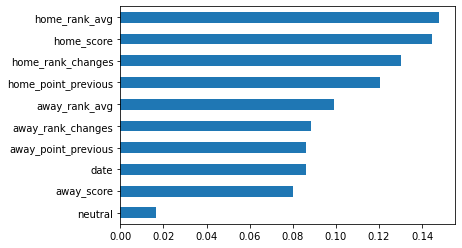

In [391]:
from matplotlib.pyplot import figure
print(r.feature_importances_)
feat_importances = pd.Series(r.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending = True)
feat_importances.plot(kind='barh')


In [395]:
sum(r.feature_importances_)

1.0

# DecisionTreeClassifier()

In [457]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [458]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

In [459]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 5 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 1] <= 1.5 else to node 2.
	node=1 is a split node: go to node 3 if X[:, 2] <= 1.5 else to node 4.
	node=2 is a leaf node.
		node=3 is a leaf node.
		node=4 is a leaf node.


In [464]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=1000)
tree.plot_tree(clf,  filled = True)
plt.show()

In [318]:
final_df.head()

date   home_team     away_team  home_score  away_score tournament  \
0  1994    Barbados       Grenada         0.0         0.0   Friendly   
1  1994       Ghana         Egypt         2.0         1.0   Friendly   
2  1994        Mali  Burkina Faso         1.0         1.0   Friendly   
3  1994  Mauritania          Mali         1.0         3.0   Friendly   
4  1994    Thailand       Nigeria         1.0         1.0   Friendly   

         city     country  neutral winner  away_rank_avg  home_rank_avg  \
0  Bridgetown    Barbados    False    Tie          135.4          101.6   
1       Accra       Ghana    False  Ghana           24.1           28.1   
2      Bamako        Mali    False    Tie          100.2           51.5   
3  Nouakchott  Mauritania    False   Mali           51.5          143.6   
4     Bangkok    Thailand    False    Tie           11.2           76.3   

   away_point_previous  home_point_previous  away_rank_changes  \
0                  5.8                 12.5                0.1   
1                 44.9                 42.7                0.4   
2                 12.4                 31.7                3.0   
3                 31.7                  3.8                1.8   
4                 53.3                 22.3                0.6   

   home_rank_changes  
0                0.7  
1                1.1  
2                1.8  
3                0.7  
4               -1.6

# SVM  + StandardizeScaler()

### Supervised

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics
from sklearn import cluster
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler()
X.iloc[:,:6] = scaler.fit_transform(X.iloc[:,:6])
X = pd.get_dummies(clean[['date', 'home_score', 'away_score',
        'neutral', 'away_rank_avg',
       'home_rank_avg', 'away_point_previous', 'home_point_previous',
       'away_rank_changes', 'home_rank_changes']],drop_first=True)
Y = pd.get_dummies(clean['winner'])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)


In [44]:
X_train

date  home_score  away_score  neutral  away_rank_avg  home_rank_avg  \
16705  2012         0.0         2.0    False      46.833333      94.250000   
6990   2002         2.0         0.0    False      76.636364      31.181818   
5320   2000         3.0         0.0    False      52.833333      36.750000   
20857  2017         0.0         1.0    False       5.833333      62.000000   
15954  2012         0.0         3.0     True      11.666667       8.083333   
...     ...         ...         ...      ...            ...            ...   
16713  2013         0.0         0.0    False      98.166667     117.583333   
7690   2003         2.0         0.0     True      55.666667      82.000000   
5830   2001         0.0         0.0     True      78.583333      84.916667   
7652   2003         2.0         1.0    False     150.500000     143.666667   
19687  2016         5.0         0.0    False      68.666667      22.916667   

       away_point_previous  home_point_previous  away_rank_changes  \
16705           617.000000           367.666667          -0.833333   
6990            501.363636           636.545455          -1.636364   
5320            526.583333           570.666667          -0.250000   
20857          1292.666667           573.750000           0.416667   
15954          1007.666667          1102.750000           0.250000   
...                    ...                  ...                ...   
16713           357.166667           279.916667           0.833333   
7690            550.000000           483.166667          -1.916667   
5830            486.500000           469.833333           0.083333   
7652            262.916667           289.750000          -1.166667   
19687           532.750000           894.083333          -4.250000   

       home_rank_changes  
16705          -0.416667  
6990            0.000000  
5320            0.333333  
20857          -0.666667  
15954           0.416667  
...                  ...  
16713           0.750000  
7690           -2.000000  
5830            0.166667  
7652           -0.750000  
19687           1.583333  

[13796 rows x 10 columns]

In [45]:
svm_X_train = X_train.values.tolist()
svm_X_test = X_test.values.tolist()

In [48]:
listOfPositions = getIndexes(Y_train, 1)
listOfPositions2 = getIndexes(Y_test, 1)

Y_pred_lst = [a[1] for a in listOfPositions]
Y_test_lst = [a[1] for a in listOfPositions2]

In [ ]:
len(Y_pred_lst), len(svm_X_train)

In [50]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
trainedsvm = svm.SVC().fit(svm_X_train, Y_pred_lst)
predictionsvm = trainedsvm.predict(svm_X_test)
print(confusion_matrix(Y_test_lst,predictionsvm))
print(classification_report(Y_test_lst,predictionsvm))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
                          precision    recall  f1-score   support

             Afghanistan       0.00      0.00      0.00         4
                 Albania       0.00      0.00      0.00        13
                 Algeria       0.00      0.00      0.00        20
          American Samoa       0.00      0.00      0.00         1
                 Andorra       0.00      0.00      0.00         1
                  Angola       0.00      0.00      0.00        19
                Anguilla       0.00      0.00      0.00         1
     Antigua and Barbuda       0.00      0.00      0.00         7
               Argentina       0.00      0.00      0.00        31
                 Armenia       0.00      0.00      0.00        12
                   Aruba       0.00      0.00      0.00         1
               Australia       0.00      0.00      0.00        21
                 Aust

C:\Users\niceb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# PCA (Principal Component Analysis) + KNN (K-Nearest Neighbors)
We decided to use PCA in order to generate clusters within our data with respect to the rank they are located in which reduced the features' dimensionality. However, after witnessing the results, we felt it was necessary to combine the results of PCA with KNN in order to optimize accuracy.

In [601]:
max(rankingMean["rank"]), min(rankingMean["rank"])

(207.91666666666666, 1.0)

In [605]:
clean.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'winner', 'away_rank_avg',
       'home_rank_avg', 'away_point_previous', 'home_point_previous',
       'away_rank_changes', 'home_rank_changes'],
      dtype='object')

In [644]:
X = pd.get_dummies(clean[['date', 'home_score', 'away_score',
        'neutral', 'away_rank_avg',
       'home_rank_avg', 'away_point_previous', 'home_point_previous',
       'away_rank_changes', 'home_rank_changes']],drop_first=True)
Y = pd.get_dummies(clean['winner'])

In [649]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

pca = PCA(0.9)

cols = clean[X.columns]
testX = cols
reduced = pca.fit_transform(testX)
testY = clean['winner']

X_train, X_test, y_train, y_test = train_test_split(reduced, testY, test_size=0.001, random_state=1)
X_train_scale = StandardScaler().fit_transform(X_train)
X_test_scale = StandardScaler().fit_transform(X_test)
X_train_PCA = pca.fit_transform(X_train_scale)
X_test_PCA = pca.fit_transform(X_test_scale)
r = KNeighborsClassifier(n_neighbors=15)
r.fit(X_train_PCA, y_train)
y_pred = r.predict(X_test_PCA)
df2 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df2

Actual        Predicted
12626      Jamaica  Solomon Islands
8920           Tie              Tie
19438        Congo              Tie
16146        Sudan        Australia
12568  El Salvador       Costa Rica
19242          Tie              Tie
16992       Poland      Netherlands
6648        Greece              Tie
5307      Bulgaria              Tie
7934           Tie              Tie
11272          Tie              Tie
13534       Greece              Tie
4049        Mexico              Tie
18805          Tie            Sudan
14700          Tie              Tie
4136       Croatia              Tie
3699           Tie     Saudi Arabia
4976      Ethiopia      El Salvador

In [650]:
print("The Accuracy for PCA fed into KNN Classifier is : " + str(df2[df2["Actual"] == df2["Predicted"]].shape[0]/df2.shape[0]))

The Accuracy for PCA fed into KNN Classifier is : 0.2777777777777778
